#mnist demo using MLP


Creat a dataloader first

In [3]:
import torch
import torchvision
from torchvision import transforms

# Define the transformation for the dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Download the MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)

# Create the dataloaders
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)


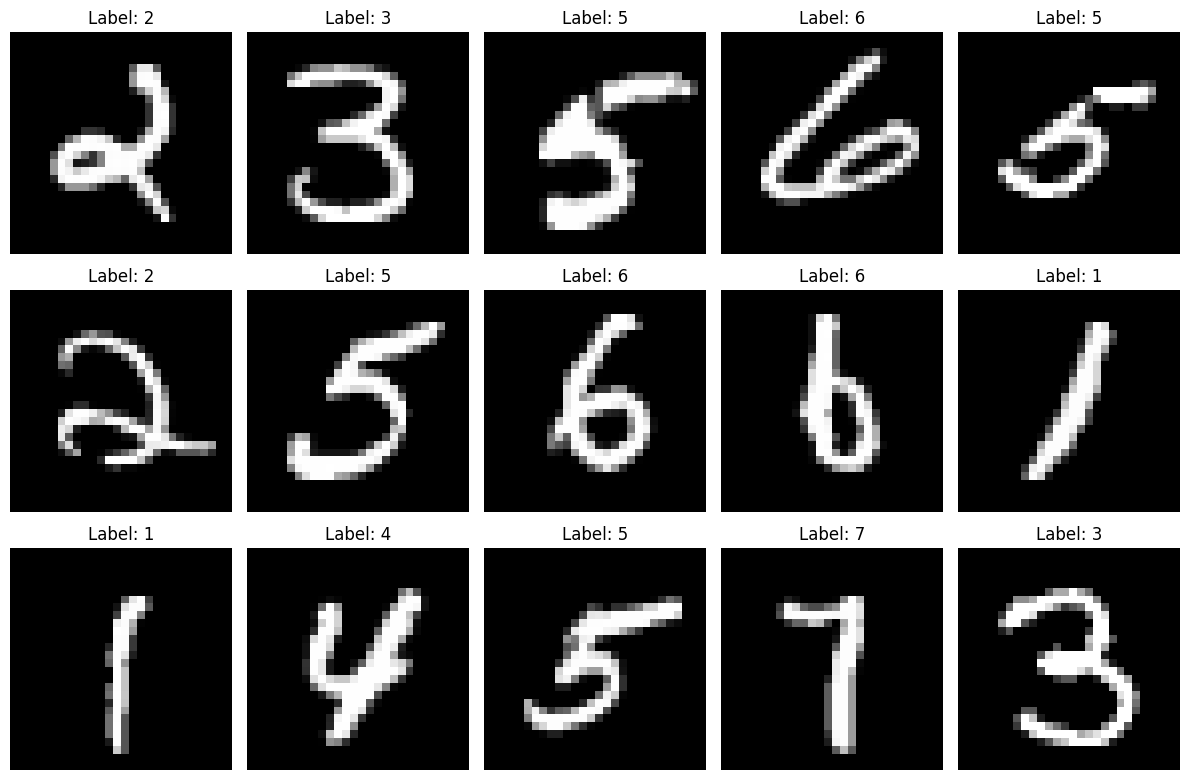

In [4]:
import matplotlib.pyplot as plt

# Get a batch of 15 images and labels from the train dataloader
images, labels = next(iter(train_dataloader))
sample_images = images[:15]
sample_labels = labels[:15]

# Create a grid of subplots to display the images
fig, axes = plt.subplots(3, 5, figsize=(12, 8))

# Iterate over the images and labels and display them in the subplots
for i, (image, label) in enumerate(zip(sample_images, sample_labels)):
    ax = axes[i // 5, i % 5]
    ax.imshow(image.squeeze(), cmap='gray')
    ax.set_title(f"Label: {label.item()}")
    ax.axis('off')

plt.tight_layout()
plt.show()


In [11]:
import torch
import torch.nn as nn

class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)
    
    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten the input tensor
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

# Define the model
input_size = 28 * 28  # MNIST image size is 28x28
hidden_size = 128
num_classes = 10  # MNIST has 10 classes (digits 0-9)
model = MLP(input_size, hidden_size, num_classes)


In [12]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [7]:
model

MLP(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)

In [13]:
from tqdm import tqdm

num_epochs = 10

for epoch in tqdm(range(num_epochs)):
    total_loss = 0
    
    for images, labels in train_dataloader:
        images = images.to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
    
    avg_loss = total_loss / len(train_dataloader)
    print(f"Epoch: {epoch+1}, Loss: {avg_loss:.4f}")


 10%|█         | 1/10 [00:10<01:36, 10.69s/it]

Epoch: 1, Loss: 0.3807


 20%|██        | 2/10 [00:18<01:11,  8.93s/it]

Epoch: 2, Loss: 0.1954


 30%|███       | 3/10 [00:26<00:58,  8.42s/it]

Epoch: 3, Loss: 0.1396


 40%|████      | 4/10 [00:34<00:49,  8.27s/it]

Epoch: 4, Loss: 0.1131


 50%|█████     | 5/10 [00:42<00:40,  8.14s/it]

Epoch: 5, Loss: 0.0940


 60%|██████    | 6/10 [00:50<00:32,  8.05s/it]

Epoch: 6, Loss: 0.0852


 70%|███████   | 7/10 [00:58<00:24,  8.03s/it]

Epoch: 7, Loss: 0.0744


 80%|████████  | 8/10 [01:05<00:16,  8.00s/it]

Epoch: 8, Loss: 0.0674


 90%|█████████ | 9/10 [01:13<00:07,  7.98s/it]

Epoch: 9, Loss: 0.0623


100%|██████████| 10/10 [01:21<00:00,  8.19s/it]

Epoch: 10, Loss: 0.0581


In [14]:
model.eval()  # Set the model to evaluation mode
total_correct = 0
total_samples = 0

with torch.no_grad():
    for images, labels in test_dataloader:
        images = images.to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        
        total_correct += (predicted == labels).sum().item()
        total_samples += labels.size(0)

accuracy = total_correct / total_samples
print(f"Test Accuracy: {accuracy * 100:.2f}%")


Test Accuracy: 97.24%


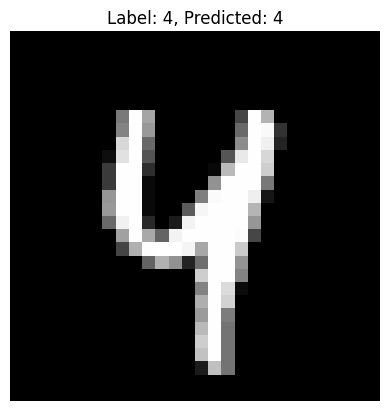